In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt


df = pd.read_excel ('/content/ASIANPAINT.xlsx')
print (df)

           Date    Adj_Close
0    2015-01-01   714.732971
1    2015-01-02   739.443176
2    2015-01-05   739.395447
3    2015-01-06   721.745300
4    2015-01-07   736.247131
...         ...          ...
1224 2019-12-24  1780.978882
1225 2019-12-26  1787.052368
1226 2019-12-27  1789.669312
1227 2019-12-30  1779.843384
1228 2019-12-31  1762.709351

[1229 rows x 2 columns]


Split Train and Test Dataset

In [104]:
X_train = df[:int(df.shape[0]*0.75)]
X_test = df[int(df.shape[0]*0.75):]

print(X_test)

           Date    Adj_Close
921  2018-09-25  1261.623779
922  2018-09-26  1253.897095
923  2018-09-27  1259.276489
924  2018-09-28  1264.949463
925  2018-10-01  1251.745361
...         ...          ...
1224 2019-12-24  1780.978882
1225 2019-12-26  1787.052368
1226 2019-12-27  1789.669312
1227 2019-12-30  1779.843384
1228 2019-12-31  1762.709351

[308 rows x 2 columns]


Simple Moving Average for k=2

In [105]:
for i in range(0,df.shape[0]-1):
    df.loc[df.index[i+1],'SMA_2'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1]) /2),1)
    
df.head()


,Date,Adj_Close,SMA_2
0,2015-01-01,714.732971,NaN
1,2015-01-02,739.443176,727.1
2,2015-01-05,739.395447,739.4
3,2015-01-06,721.745300,730.6
4,2015-01-07,736.247131,729.0


Root Mean Square Error

In [106]:
df.head()
rms = mean_squared_error(df['Adj_Close'][924:len(df)], df['SMA_2'][924:len(df)])
rms = sqrt(mean_squared_error(df['Adj_Close'][924:len(df)], df['SMA_2'][924:len(df)]))
print("Root Mean Square Error = " ,rms)


Root Mean Square Error =  11.03583438261291


Plot the Graph

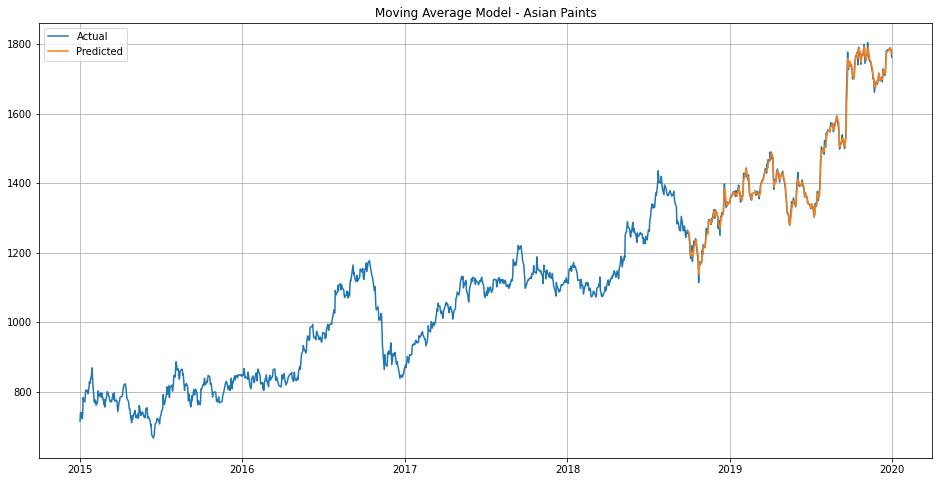

In [108]:

plt.figure(figsize=[16,8])
plt.title('Moving Average Model - Asian Paints')
plt.grid(True)
df.set_index('Date',inplace=True)
plt.plot(df['Adj_Close'],label='Actual')
plt.plot(df['SMA_2'][924:len(df)],label='Predicted')
# plt.plot(df['SMA_3'][924:len(df)],label='SMA k=3 ')
plt.legend(loc=2)

